#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# About Features

1. **Employee ID**: A unique identifier for each employee. Usually a numeric or alphanumeric code.

2. **Name**: The full name of the employee. This might be split into first and last names in some datasets.

3. **Department**: The department or division within the organization where the employee works.

4. **Job Title**: The official title or position held by the employee in the organization.

5. **Salary**: The amount of money the employee earns. This could be represented as an annual salary, hourly wage, or monthly pay.

6. **Hire Date**: The date when the employee started working at the organization. Useful for calculating tenure or experience.

7. **Gender**: The gender of the employee. This might be included in some datasets for diversity and equality analysis.

8. **Years of Experience**: The total number of years the employee has worked in their field or profession.

9. **Education Level**: The highest level of education attained by the employee, such as a high school diploma, bachelor's degree, etc.

10. **Performance Rating**: If available, this could be a measure of the employee's performance in their role, often based on annual review scores.

11. **Location**: The geographical location or office where the employee works, if the organization has multiple locations.



# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

In [12]:
import pandas as pd
import numpy as np


# Load the dataset
df = pd.read_csv("Salaries.csv")


In [13]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object')

## 1. Basic Data Exploration


In [14]:
# 1. Basic Data Exploration

# Identify the number of rows and columns
num_rows, num_cols = df.shape

# Determine the data types of each column
data_types = df.dtypes

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print("\nData types:")
print(data_types)
print("\nMissing values:")
print(missing_values)


Number of rows: 148654
Number of columns: 12

Data types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
dtype: object

Missing values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
dtype: int64


## 2. Descriptive Statistics

In [15]:
# Calculate basic statistics
basic_stats = df.describe()
mode = df['TotalPay'].mode()
# Determine the range of salaries
salary_range = df['TotalPay'].max() - df['TotalPay'].min()

# Find the standard deviation
std_dev = df['TotalPay'].std()

# Display the results
print("\nDescriptive Statistics:")
print(basic_stats.iloc[[1,3,7,5],[5,6]])
print("mode     ",mode)
print(f"\nRange of salaries: {salary_range}")
print(f"Standard Deviation of salaries: {std_dev}")


Descriptive Statistics:
           TotalPay  TotalPayBenefits
mean   74768.321972      93692.554811
min     -618.130000       -618.130000
max   567595.430000     567595.430000
50%    71426.610000      92404.090000
mode      0    0.0
Name: TotalPay, dtype: float64

Range of salaries: 568213.56
Standard Deviation of salaries: 50517.005273949944


## 3. Data Cleaning

### Here I filled the missing values with median to Overtime Pay and Other Pay,and this is why I used the medien here :

Filling missing values in a dataset with the median is a common practice due to its statistical robustness and ability to mitigate the impact of outliers. The median is a measure of central tendency that represents the middle value in a sorted dataset, dividing it into two equal halves. This characteristic makes the median less sensitive to extreme values compared to other measures such as the mean.

When dealing with missing values, replacing them with the median helps maintain the overall distribution of the data, preserving its central tendency without being unduly influenced by outliers. This approach is particularly useful when the dataset contains skewed or non-normally distributed variables, as the median is less affected by extreme values and provides a more representative estimate of the typical value.

Additionally, the use of the median is suitable for both numerical and ordinal data types, making it a versatile choice for imputation across various types of variables. This robustness and versatility make the median a preferred option in scenarios where maintaining the integrity of the data distribution and reducing the impact of outliers are essential considerations for reliable statistical analyses and model building.

### As for base Pay column, I filled the missing values in it with a simple process like this :
    BasePay = TotalPay - OvertimePay - OtherPay.
Because : TotalPay = BasePay + OvertimePay + Otherpay.
And I have no missing values in TotalPay column and OvertimePay, OtherPay are full form the previous demand.
So that the best choice is to fill with this process.


### As for benefits column, I filled the missing values in it with a simple process too :
    Benefits = TotalPayBenefits - TotalPay.
Because : TotalPayBenefits = TotalPay + Benefits.
And I have no missing values in TotalPayBenefits and TotalPay, so this is the best choice for filling Benefits.

In [16]:
#3. Data Cleaning

def fill_missing_values ():
    df.OvertimePay.fillna(df['OvertimePay'].median(), inplace=True)  
    df.OtherPay.fillna(df['OvertimePay'].median(), inplace=True)
    df.BasePay.fillna(df.TotalPay - df.OvertimePay - df.OtherPay, inplace=True)
    df.Benefits.fillna(df.TotalPayBenefits - df.TotalPay,inplace=True)
    df.Notes.fillna('-',inplace=True)

In [17]:
# Call the Function
fill_missing_values()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
dtype: int64


## 4. Basic Data Visualization:

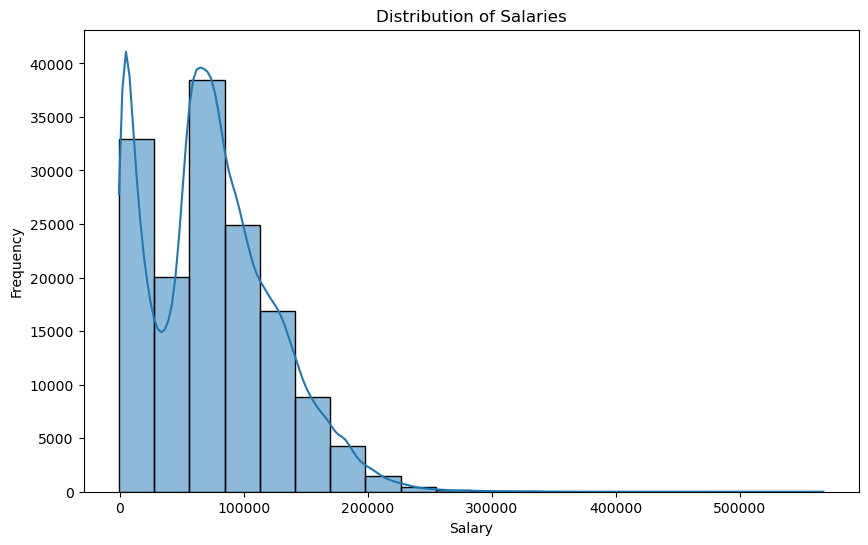

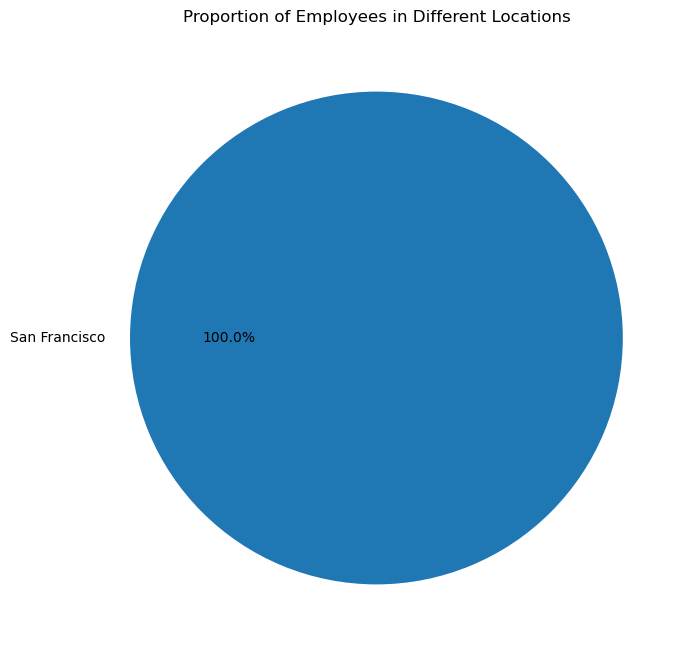

In [18]:
#4. Basic Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Create histogram for salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=20, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Create pie chart for department distribution
plt.figure(figsize=(10, 8))
df['Agency'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Locations')
plt.ylabel('')
plt.show()


## 5. Grouped Analysis


In [19]:
#5. Grouped Analysis

# Group the data by 'Year' and calculate average salaries and benefits
average_salaries_and_benefits_by_year = df.groupby('Year')[['TotalPay','Benefits']].mean()
print("\nAverage Salaries and Benefits by Year:")
print(average_salaries_and_benefits_by_year)
print('=================************================')

# Group by 'JobTitle' and calculate average salary and Benefits for each JobTile
grouped_salaries_and_benefits_by_JobTile = df.groupby('JobTitle')[['TotalPay','Benefits']].mean()
print("\nAverage Salaries and Benefits by JobTile:")
print(grouped_salaries_and_benefits_by_JobTile)





Average Salaries and Benefits by Year:
          TotalPay      Benefits
Year                            
2011  71744.103871      0.000000
2012  74113.262265  26439.966967
2013  77611.443142  23829.076572
2014  75463.918140  24787.000743
=================***********================

Average Salaries and Benefits by JobTile:
                                                    TotalPay    Benefits
JobTitle                                                                
ACCOUNT CLERK                                   44035.664337      0.0000
ACCOUNTANT                                      47429.268000      0.0000
ACCOUNTANT INTERN                               29031.742917      0.0000
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000  17975.5900
ACUPUNCTURIST                                   67594.400000      0.0000
...                                                      ...         ...
X-RAY LABORATORY AIDE                           52705.880385      0.0000
X-Ray Laboratory 

## 6. Simple Correlation Analysis

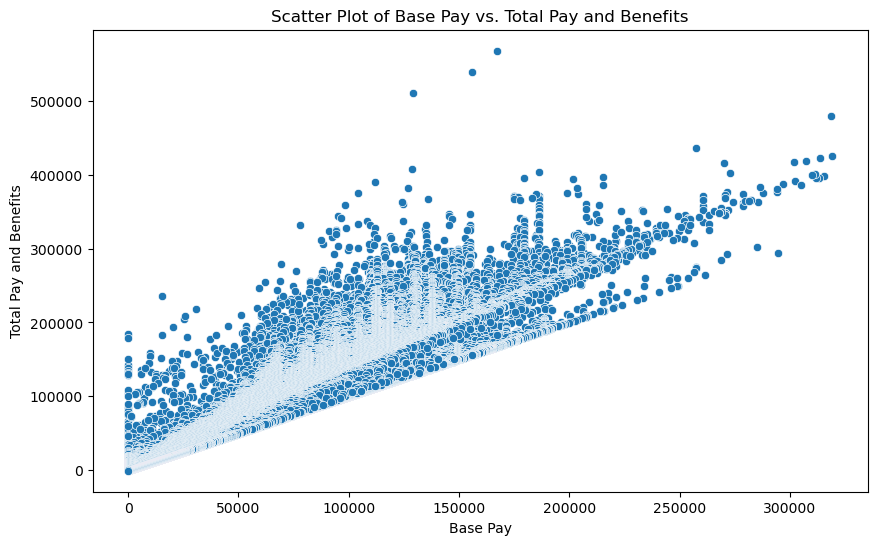


Correlation between Base Pay and Total Pay & Benefits: 0.9468639852010132


In [20]:
#6. Simple Correlation Analysis


# Identify correlation between 'TotalPayBenefits' and 'BasePay'
correlation = df['TotalPayBenefits'].corr(df['BasePay'])

# Plot a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='TotalPayBenefits', data=df)
plt.title('Scatter Plot of Base Pay vs. Total Pay and Benefits')
plt.xlabel('Base Pay')
plt.ylabel('Total Pay and Benefits')
plt.show()

# Display the correlation coefficient
print("\nCorrelation between Base Pay and Total Pay & Benefits:",end=' ')
print(correlation)


## 8. Summary of Insights:

    The dataset has information on employees, including their names, job titles, pay details, and agency.

    The average salary varies across different years in range 71744.103871 and 77611.443142.

    The distribution of salaries is right-skewed, with most employees earning lower salaries and a few earning higher salaries.

    The pie chart indicates the proportion of employees in different locations, and in our dataset all employees work in San Francisco.
    
    The 'BasePay' and 'TotalPayBenefits' columns show a positive correlation.


This summary provides an overview of the dataset, insights from descriptive statistics, data cleaning, basic visualizations, grouped analysis, and correlation analysis.